In [113]:
%matplotlib inline
import numpy as np
from numpy.random import normal, randint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy.polynomial.legendre import legval
from scipy.stats import poisson

# Inputs

In [144]:
# Number of potentials:
n_V = int(1e4)
# x limits:
x_i = -1
x_f = 1
# Number of x coordinates:
n_x = 100
x_vec = np.linspace(x_i, x_f, n_x)
# Damping factor
lamb = 0.8
# Number of legendre polynomials
n_L = 50
# First legendre coefficient sigma
sigma0 = 20./(x_f-x_i)**2
# Legendre coefficient sigmas
def weight_func(i):
    return lamb**i
sigma = sigma0 * np.asarray([weight_func(i) for i in range(n_L)])

print("Input parameters:\n"
      "  n_V= %i\n"
      "  x_i= %0.2f\n"
      "  x_f= %0.2f\n"
      "  n_x= %i\n"
      "  lamb= %0.2f\n"
      "  n_L= %0.2f\n"
      "  sigma0= %0.2f"
      % (n_V,x_i, x_f, n_x, lamb, n_L, sigma0))

Input parameters:
  n_V= 10000
  x_i= -1.00
  x_f= 1.00
  n_x= 100
  lamb= 0.80
  n_L= 50.00
  sigma0= 5.00


# Generate the potentials

In [145]:
# Randomly select legendre coefficients
aL=normal(loc=0, scale=sigma, size=(n_V,n_L))

# Evaluate the legendre polynomials on the x grid:
V_grid = legval(x_vec, aL.transpose())

# Remove the average values
V_grid = V_grid - np.outer(aL[:,0],np.ones(n_x))

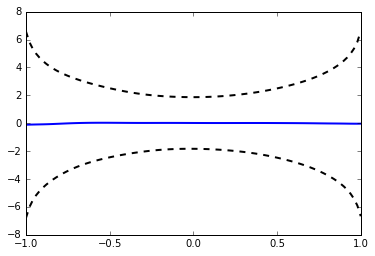

In [146]:
plt.clf()
plt.plot(x_vec, np.mean(V_grid, axis=0), 'b-', lw=2)
plt.plot(x_vec, np.mean(V_grid, axis=0)+np.std(V_grid, axis=0), 'k--', lw=2)
plt.plot(x_vec, np.mean(V_grid, axis=0)-np.std(V_grid, axis=0), 'k--', lw=2)

# Plot some random potentials

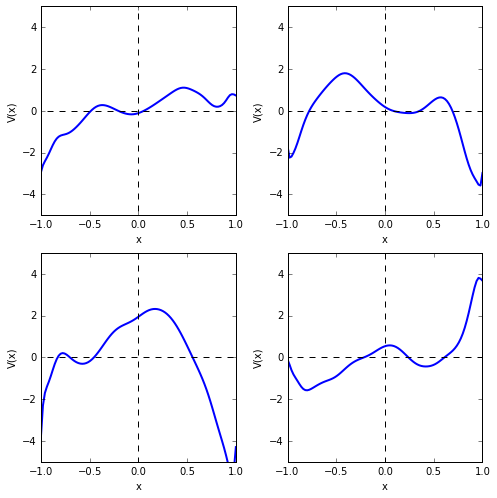

In [143]:
nrows = 2
ncols = 2
nplot = nrows * ncols
Vints = randint(0,n_V, nplot)
Vplot = V_grid[Vints,::]

plt.clf()
fig, axes = plt.subplots(nrows = nrows, ncols = ncols)
fig.set_size_inches(7,7)
subax = axes.flat

for i in range(0,nplot):
        subax[i].plot(x_vec, Vplot[i], linewidth = 2)
        subax[i].axhline(y=0,xmin=-1,xmax=1, linestyle='dashed' ,color = 'k')
        subax[i].axvline(x=0,ymin=-10,ymax=10, linestyle='dashed' ,color = 'k')
        subax[i].set_xlabel("x")
        subax[i].set_ylabel("V(x)")
        subax[i].set_ylim((-2*sigma0,2*sigma0))

plt.tight_layout()
plt.show()
plt.close()